In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from ipywidgets import interactive
from sklearn.tree import DecisionTreeClassifier, export_graphviz


data = pd.read_csv('P12-Churn-Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The data's source is superdatasceience.com. I higly reccomend the Udemy modules that Kiril has created!

Let's have a look at the data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


If the customer has a creadit card then the value at the corresponding column will be equal to 1, otherwise 0.

Next we’ll convert the categorical values into numeric values, so our ML algorithms can process the data.
More specifically, if the clinet is female, then the calue will change to 1, otherwise to 0.
If the customer has already left the bank , then Exited = 1.

In [3]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


Let's check the other categorical columns.

In [5]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

So we have only customers only from 3 countries. Let's convert the countries' names into numerical values as well.

In [6]:
data['Geography'].replace(['France', 'Spain', 'Germany'],[0,1,2],inplace=True)



In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


Let's look once more at twhat kind of information we have.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


For any kind of regression, the customers' names and Ids are not important. We can either remove them or make a new dataset with only the necessary columns.

In [9]:
data.pop('CustomerId')
data.pop('RowNumber')
data.pop('Surname')

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

To decide which features of the data to include in our predictive churn model, we’ll examine the correlation between churn and each customer feature.

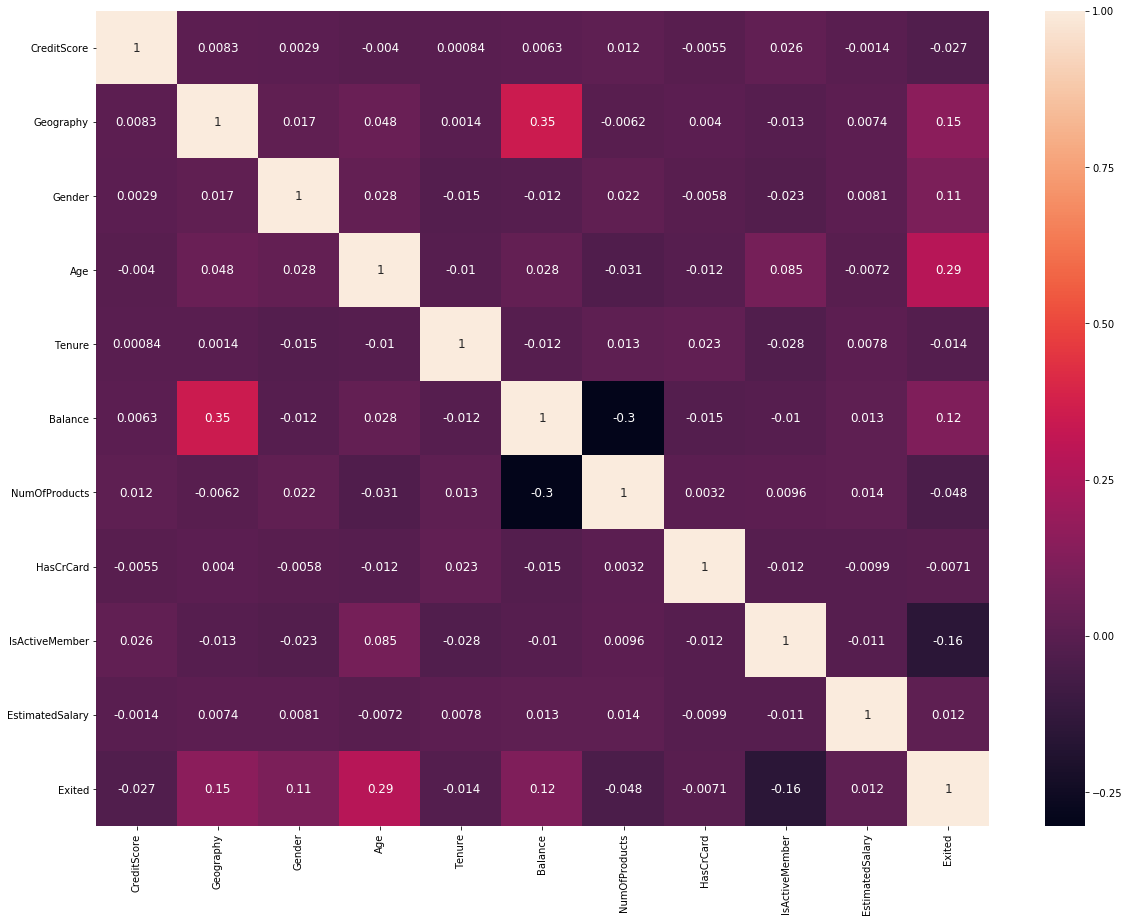

In [10]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the coefficients from the upper plot, it doesn't look like we have any multicollinearity.

***Predictive modelling***

We will consider several different models to predict customer churn. 
To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set,
with the test set being 25% of the total records.



In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.25)

train_y = train['Exited']
test_y = test['Exited']

train_x = train
train_x.pop('Exited')
test_x = test
test_x.pop('Exited')

8022    1
9749    0
6       0
8147    1
3873    0
       ..
3966    0
1646    1
3211    0
7672    0
1957    1
Name: Exited, Length: 2500, dtype: int64

***Logistic regression***

Logistic regression is one of the more basic classification algorithms in a data scientist’s toolkit. It is used to predict a category or group based on an observation. Logistic regression is usually used for binary classification (1 or 0, win or lose, true or false). The output of logistic regression is a probability, which will always be a value between 0 and 1. While the output value does not give a classification directly, we can choose a cutoff value so that inputs with with probability greater than the cutoff belong to one class, and those with less than the cutoff belong to the other.

Intercept: [-0.00107503]
Regression: [[-5.17156633e-03  4.43185832e-03  2.14782690e-03  4.76602781e-02
  -5.89409201e-03  3.81797503e-06 -2.14403887e-03 -6.84462359e-04
  -4.80683364e-03 -1.78629912e-06]]
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2012
           1       0.38      0.08      0.13       488

   micro avg       0.79      0.79      0.79      2500
   macro avg       0.60      0.52      0.51      2500
weighted avg       0.73      0.79      0.74      2500



/anaconda2/envs/mde/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

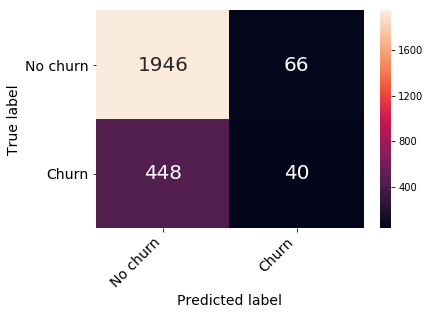

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

We got 79% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

***How to handle imbalanced classes***

It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [13]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The problem is that the customers who have exited are much smaller than those who have stayed. This intoduces a bias favoring those who have stayed.

In [14]:
from sklearn.utils import resample

data_majority = data[data['Exited']==0]
data_minority = data[data['Exited']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=7963, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now that we have a 1:1 ratio for our classes, let’s train another logistic regression model:

In [15]:
train, test = train_test_split(data_upsampled, test_size = 0.25)

train_y_upsampled = train['Exited']
test_y_upsampled = test['Exited']

train_x_upsampled = train
train_x_upsampled.pop('Exited')
test_x_upsampled = test
test_x_upsampled.pop('Exited')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.66
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1993
           1       0.66      0.67      0.67      1989

   micro avg       0.66      0.66      0.66      3982
   macro avg       0.66      0.66      0.66      3982
weighted avg       0.66      0.66      0.66      3982



/anaconda2/envs/mde/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We can notice an improvement of the precision and recall for predictions in the positive class (exited).

The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved. There are a number of other ways to deal with imbalanced classes, including:

Down-sampling the majority class.

In [16]:

data_majority = data[data['Exited']==0]
data_minority = data[data['Exited']==1]

data_minority_upsampled = resample(data_majority,
replace=True,
n_samples=2037, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Exited'].value_counts()

0    10000
Name: Exited, dtype: int64

Using a different performance metric.

Area Under ROC Curve (AUROC) represents the likelihood of a model distinguishing observations between two classes. 
In very simple terms, AUROC gives a single measure of how a model’s true positive rate and 
false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. To calculate AUROC, we need the predicted class probabilities:


In [17]:
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.6670723609164684
Balanced model AUROC: 0.70555869626145


Interestingly, the AUROC scores are very similar between the two models. 
Both are above 0.7 however, suggesting that both models have the ability to distiguish between observations from each class.

Decision Trees

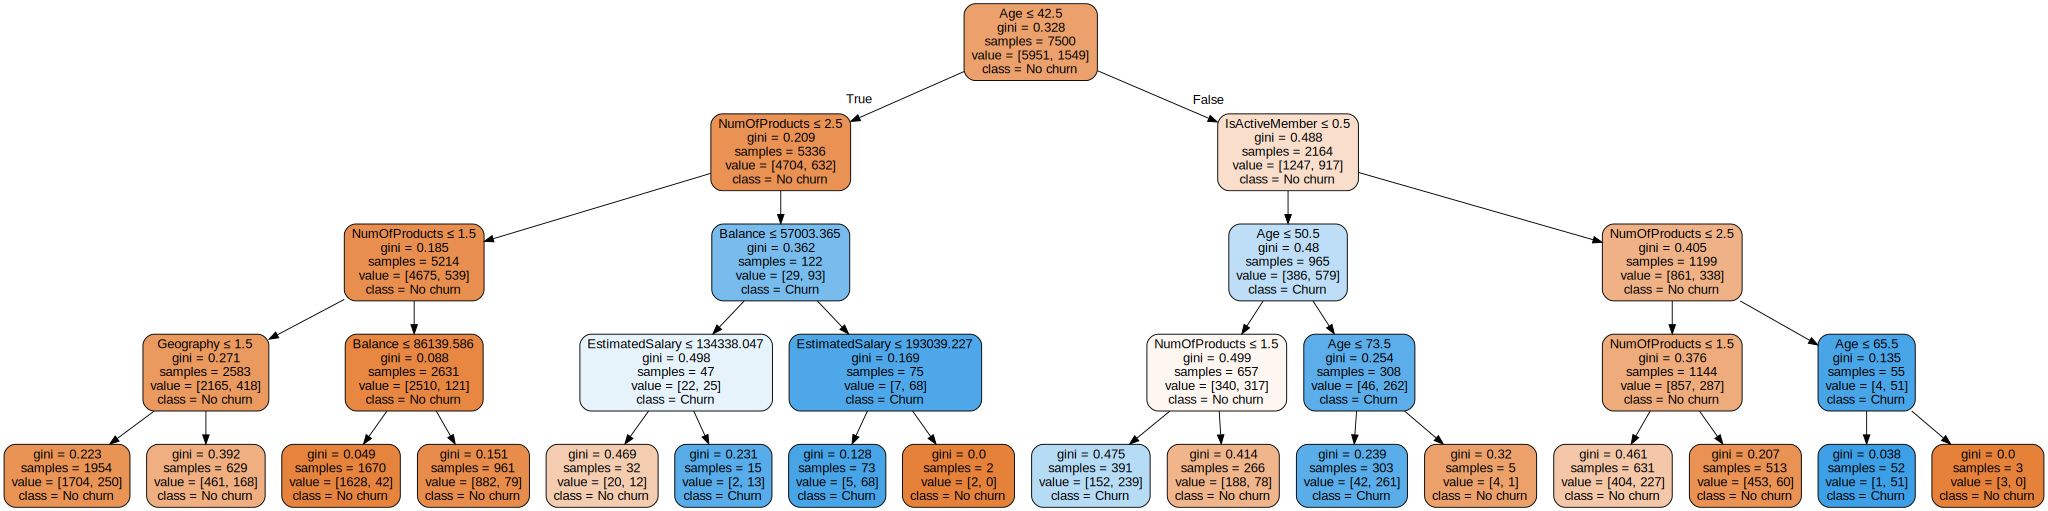

In [18]:
from sklearn import tree
from sklearn import tree
import graphviz 

# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)
display(SVG(graph.pipe(format='svg')))


*** Na to dw  https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084 ***

***Random forests***

In [19]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.86


/anaconda2/envs/mde/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
data = pd.read_csv('P12-Churn-Modelling.csv')
data.pop('CustomerId')
data.pop('RowNumber')
data.pop('Surname')
data.pop('Gender')
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


Thanks to this link https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084
we can change the tree's parameters.
In case you are using jupyter lab you might need to execute this command

         jupyter labextension install @jupyter-widgets/jupyterlab-manager
(found the answer here        https://stackoverflow.com/questions/49542417/how-to-get-ipywidgets-working-in-jupyter-lab  ).

you will need this command in order to be able to run the widgets in jupyter lab. This step is not necessary if you are using the traditional jupyter.

In [21]:
labels = data.columns
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0, criterion = crit, splitter = split, max_depth = depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
    estimator.fit(X=train_x, y=train_y)
    graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=labels, class_names=['0', '1', '2'], filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree , crit = ["gini", "entropy"], split = ["best", "random"], depth=[1,2,3,4], min_split=(0.1,1) , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…